In [1]:
import pandas as pd

# Load RESPONDENTI
respondenti_df = pd.read_excel('RESPONDENTI.xlsx', sheet_name='Respondents')
respondenti_df['ID_ID'] = respondenti_df['ID_ID'].astype(str)

selected_ids = respondenti_df['ID_ID'].unique().tolist()

# Load Nutrix base
nutrix_results_base_df = pd.read_excel('Nutrix results base.xlsx')
nutrix_results_base_df['ID_ID'] = nutrix_results_base_df['ID_ID'].astype(str)

# Filter
nutrix_filtered_df = nutrix_results_base_df[
    nutrix_results_base_df['ID_ID'].isin(selected_ids)
]

# Select Iron column
iron_intake_base_df = nutrix_filtered_df[['ID_ID', 'Iron(mg)']]
iron_intake_base_df


,ID_ID,Iron(mg)
3,K4R2,10.171578
4,K5R2,6.945919
6,K7R3,16.216597
14,K15R6,12.755438
15,K16R6,13.805700
...,...,...
245,K289R84,15.768746
247,K291R85,17.137108
248,K292R85,15.290422
257,K301R88,11.848527


loaded the intake base

what we need for analysis intake_base

In [2]:
# Load the Nutrix results follow-up file
nutrix_results_followup_df = pd.read_excel('Nutrix results follow up.xlsx')

# Ensure ID is string
nutrix_results_followup_df['ID_ID'] = nutrix_results_followup_df['ID_ID'].astype(str)

# Filter follow-up by selected IDs
nutrix_followup_filtered_df = nutrix_results_followup_df[
    nutrix_results_followup_df['ID_ID'].isin(selected_ids)
]

# Extract only Iron(mg) column
iron_intake_followup_df = nutrix_followup_filtered_df[['ID_ID', 'Iron(mg)']]

iron_intake_followup_df


,ID_ID,Iron(mg)
2,K7R3,11.329698
7,K16R6,8.178908
9,K15R6,11.516336
10,K19R7,12.530420
12,K18R7,17.865120
17,K26R9,12.261111
18,K25R9,12.512165
23,K34R12,4.384073
25,K35R12,8.348134
31,K48R16,16.732477


loaded the intake followup 

In [3]:
Nutrix_merged_df = pd.merge(
    iron_intake_base_df.add_prefix('base_'),
    iron_intake_followup_df.add_prefix('followup_'),
    left_on='base_ID_ID',
    right_on='followup_ID_ID',
    how='inner'
)
print(Nutrix_merged_df.shape)
Nutrix_merged_df.head(80)



(47, 4)


,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg)
0,K7R3,16.216597,K7R3,11.329698
1,K15R6,12.755438,K15R6,11.516336
2,K16R6,13.805700,K16R6,8.178908
3,K18R7,10.280073,K18R7,17.865120
4,K19R7,3.301376,K19R7,12.530420
5,K25R9,13.506133,K25R9,12.512165
6,K26R9,9.601840,K26R9,12.261111
7,K34R12,26.423220,K34R12,4.384073
8,K35R12,24.946007,K35R12,8.348134
9,K48R16,30.928040,K48R16,16.732477


here its even MERGED

potrebuju vyfiltrovat FEMALE/MALE 

In [4]:
import pandas as pd

# Load RESPONDENTI
respondenti_df = pd.read_excel('RESPONDENTI.xlsx', sheet_name='Respondents')
respondenti_df['ID_ID'] = respondenti_df['ID_ID'].astype(str)

# Keep only ID + sex
sex_df = respondenti_df[['ID_ID', 'FEMALE/MALE']].rename(columns={'FEMALE/MALE': 'sex'})

# Ensure base_ID_ID is string
Nutrix_merged_df['base_ID_ID'] = Nutrix_merged_df['base_ID_ID'].astype(str)

# Drop existing sex/ID_ID columns in Nutrix_merged_df to prevent _x/_y
Nutrix_merged_df = Nutrix_merged_df.drop(columns=['sex', 'ID_ID'], errors='ignore')

# Merge
Nutrix_merged_withsex_df = Nutrix_merged_df.merge(
    sex_df,
    left_on='base_ID_ID',
    right_on='ID_ID',
    how='left'
)

# Drop the extra ID_ID column from RESPONDENTI
Nutrix_merged_withsex_df = Nutrix_merged_withsex_df.drop(columns=['ID_ID'])

# Display the clean dataframe
Nutrix_merged_withsex_df.head(80)


,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg),sex
0,K7R3,16.216597,K7R3,11.329698,F
1,K15R6,12.755438,K15R6,11.516336,M
2,K16R6,13.805700,K16R6,8.178908,F
3,K18R7,10.280073,K18R7,17.865120,M
4,K19R7,3.301376,K19R7,12.530420,F
5,K25R9,13.506133,K25R9,12.512165,M
6,K26R9,9.601840,K26R9,12.261111,F
7,K34R12,26.423220,K34R12,4.384073,M
8,K35R12,24.946007,K35R12,8.348134,F
9,K48R16,30.928040,K48R16,16.732477,M


In [5]:
# Subset males
Nutrix_males_df = Nutrix_merged_withsex_df[Nutrix_merged_withsex_df['sex'] == 'M'].copy()

# Subset females
Nutrix_females_df = Nutrix_merged_withsex_df[Nutrix_merged_withsex_df['sex'] == 'F'].copy()

# Display shapes
print("Males:", Nutrix_males_df.shape)
print("Females:", Nutrix_females_df.shape)

# Optional: display first few rows
display(Nutrix_males_df.head())
display(Nutrix_females_df.head())


Males: (23, 5)
Females: (24, 5)


,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg),sex
1,K15R6,12.755438,K15R6,11.516336,M
3,K18R7,10.280073,K18R7,17.865120,M
5,K25R9,13.506133,K25R9,12.512165,M
7,K34R12,26.423220,K34R12,4.384073,M
9,K48R16,30.928040,K48R16,16.732477,M


,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg),sex
0,K7R3,16.216597,K7R3,11.329698,F
2,K16R6,13.805700,K16R6,8.178908,F
4,K19R7,3.301376,K19R7,12.530420,F
6,K26R9,9.601840,K26R9,12.261111,F
8,K35R12,24.946007,K35R12,8.348134,F


In [6]:
Nutrix_females_df

,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg),sex
0,K7R3,16.216597,K7R3,11.329698,F
2,K16R6,13.805700,K16R6,8.178908,F
4,K19R7,3.301376,K19R7,12.530420,F
6,K26R9,9.601840,K26R9,12.261111,F
8,K35R12,24.946007,K35R12,8.348134,F
10,K49R16,31.695799,K49R16,8.896853,F
12,K56R18,21.941473,K56R18,5.220058,F
14,K62R20,9.678336,K62R20,5.316054,F
16,K71R23,9.533543,K71R23,5.332491,F
18,K74R24,13.883694,K74R24,3.613500,F


In [7]:
# Remove rows with any NaN values in the dataframe
Nutrix_females_no_nan_df = Nutrix_females_df.dropna().copy()

# Display the cleaned dataframe
print("After removing NaNs, shape:", Nutrix_females_no_nan_df.shape)
Nutrix_females_no_nan_df.head(80)


After removing NaNs, shape: (24, 5)


,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg),sex
0,K7R3,16.216597,K7R3,11.329698,F
2,K16R6,13.805700,K16R6,8.178908,F
4,K19R7,3.301376,K19R7,12.530420,F
6,K26R9,9.601840,K26R9,12.261111,F
8,K35R12,24.946007,K35R12,8.348134,F
10,K49R16,31.695799,K49R16,8.896853,F
12,K56R18,21.941473,K56R18,5.220058,F
14,K62R20,9.678336,K62R20,5.316054,F
16,K71R23,9.533543,K71R23,5.332491,F
18,K74R24,13.883694,K74R24,3.613500,F


In [8]:
Nutrix_males_df

,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg),sex
1,K15R6,12.755438,K15R6,11.516336,M
3,K18R7,10.280073,K18R7,17.865120,M
5,K25R9,13.506133,K25R9,12.512165,M
7,K34R12,26.423220,K34R12,4.384073,M
9,K48R16,30.928040,K48R16,16.732477,M
11,K55R18,17.593195,K55R18,6.534613,M
13,K61R20,11.059400,K61R20,4.362396,M
15,K70R23,6.735918,K70R23,8.475930,M
17,K73R24,20.354700,K73R24,4.780000,M
19,K81R26,10.587582,K81R26,8.133017,M


In [9]:
Nutrix_males_no_nan_df = Nutrix_males_df.dropna().copy()

print("After removing all NaNs, shape:", Nutrix_males_no_nan_df.shape)
Nutrix_males_no_nan_df.head(80)


After removing all NaNs, shape: (23, 5)


,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg),sex
1,K15R6,12.755438,K15R6,11.516336,M
3,K18R7,10.280073,K18R7,17.865120,M
5,K25R9,13.506133,K25R9,12.512165,M
7,K34R12,26.423220,K34R12,4.384073,M
9,K48R16,30.928040,K48R16,16.732477,M
11,K55R18,17.593195,K55R18,6.534613,M
13,K61R20,11.059400,K61R20,4.362396,M
15,K70R23,6.735918,K70R23,8.475930,M
17,K73R24,20.354700,K73R24,4.780000,M
19,K81R26,10.587582,K81R26,8.133017,M


In [10]:
# Count missing follow-up Iron before cleaning
print("Males with missing follow-up Iron:", Nutrix_males_df['followup_Iron(mg)'].isna().sum())
print("Females with missing follow-up Iron:", Nutrix_females_df['followup_Iron(mg)'].isna().sum())

# Count available (non-NaN) follow-up Iron
print("Males with follow-up Iron:", Nutrix_males_df['followup_Iron(mg)'].notna().sum())
print("Females with follow-up Iron:", Nutrix_females_df['followup_Iron(mg)'].notna().sum())


Males with missing follow-up Iron: 0
Females with missing follow-up Iron: 0
Males with follow-up Iron: 23
Females with follow-up Iron: 24


In [11]:
nutrix_in_both = pd.merge(
    iron_intake_base_df.add_prefix('base_'),
    iron_intake_followup_df.add_prefix('followup_'),
    left_on='base_ID_ID',
    right_on='followup_ID_ID',
    how='outer'
)
# Show rows where either base_ID_ID or followup_ID_ID is NaN
nutrix_in_both[nutrix_in_both['base_ID_ID'].isna() | 
                                nutrix_in_both['followup_ID_ID'].isna()]

# Display the result



,base_ID_ID,base_Iron(mg),followup_ID_ID,followup_Iron(mg)
0,K100R32,11.145825,NaN,NaN
1,K101R32,12.540609,NaN,NaN
4,K106R34,19.158344,NaN,NaN
5,K107R34,8.228970,NaN,NaN
6,K109R35,24.807835,NaN,NaN
7,K110R35,20.918856,NaN,NaN
12,K146R45,20.075110,NaN,NaN
13,K147R45,16.045025,NaN,NaN
19,NaN,NaN,K190R57,10.992007
20,NaN,NaN,K191R57,24.847492


Jack helped me to realize that two respondents are missing in base_ID_ID

## ANALYSIS NOW

In [12]:
from scipy.stats import shapiro, ttest_rel, wilcoxon

# Extract female iron intake values
female_base = Nutrix_females_no_nan_df['base_Iron(mg)']
female_follow = Nutrix_females_no_nan_df['followup_Iron(mg)']

# --- Normality test ---
shapiro_base_f = shapiro(female_base)
shapiro_follow_f = shapiro(female_follow)

print("Shapiro-Wilk (FEMALES)")
print(f"Base p-value: {shapiro_base_f.pvalue}")
print(f"Follow-up p-value: {shapiro_follow_f.pvalue}\n")

# --- Choose test ---
if shapiro_base_f.pvalue > 0.05 and shapiro_follow_f.pvalue > 0.05:
    print("Both groups normal → paired t-test\n")
    test_f = ttest_rel(female_base, female_follow)
else:
    print("Non-normal → Wilcoxon signed-rank test\n")
    test_f = wilcoxon(female_base, female_follow)

print("RESULTS (FEMALES):")
print(test_f)


Shapiro-Wilk (FEMALES)
Base p-value: 0.0387990372852134
Follow-up p-value: 0.00010331120627585816

Non-normal → Wilcoxon signed-rank test

RESULTS (FEMALES):
WilcoxonResult(statistic=119.0, pvalue=0.3902466297149658)


/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

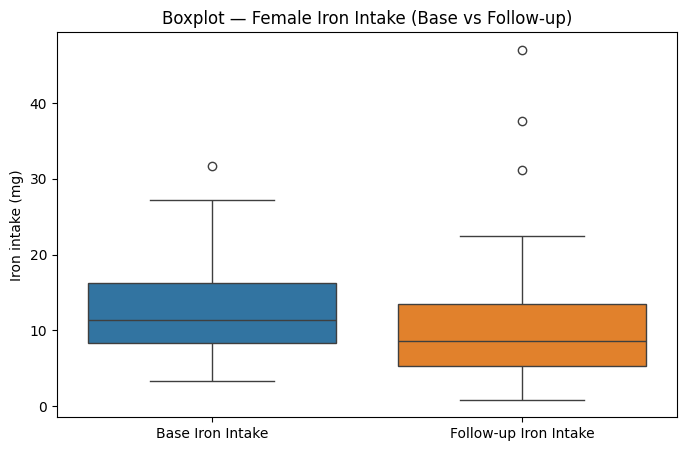

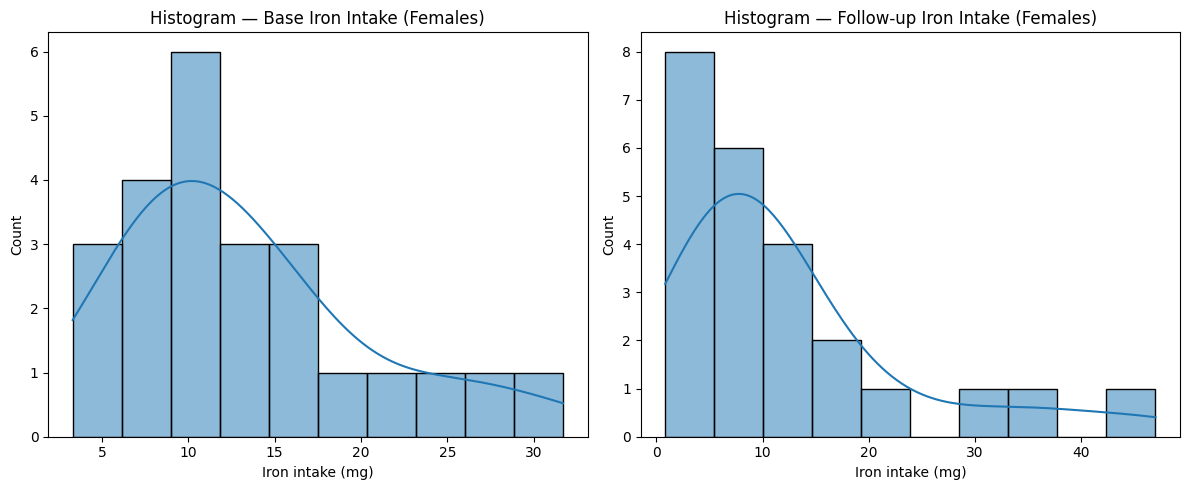

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data:
female_base = Nutrix_females_no_nan_df['base_Iron(mg)']
female_follow = Nutrix_females_no_nan_df['followup_Iron(mg)']

# -----------------------------
# 1️⃣ BOXPLOTS
# -----------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(data=[female_base, female_follow])
plt.xticks([0, 1], ['Base Iron Intake', 'Follow-up Iron Intake'])
plt.ylabel("Iron intake (mg)")
plt.title("Boxplot — Female Iron Intake (Base vs Follow-up)")
plt.show()

# -----------------------------
# 2️⃣ HISTOGRAMS WITH KDE
# -----------------------------
plt.figure(figsize=(12, 5))

# Base
plt.subplot(1, 2, 1)
sns.histplot(female_base, kde=True, bins=10)
plt.title("Histogram — Base Iron Intake (Females)")
plt.xlabel("Iron intake (mg)")

# Follow-up
plt.subplot(1, 2, 2)
sns.histplot(female_follow, kde=True, bins=10)
plt.title("Histogram — Follow-up Iron Intake (Females)")
plt.xlabel("Iron intake (mg)")

plt.tight_layout()
plt.show()


In [14]:
# Extract male iron intake values
male_base = Nutrix_males_no_nan_df['base_Iron(mg)']
male_follow = Nutrix_males_no_nan_df['followup_Iron(mg)']

# --- Normality test ---
shapiro_base_m = shapiro(male_base)
shapiro_follow_m = shapiro(male_follow)

print("Shapiro-Wilk (MALES)")
print(f"Base p-value: {shapiro_base_m.pvalue}")
print(f"Follow-up p-value: {shapiro_follow_m.pvalue}\n")

# --- Choose test ---
if shapiro_base_m.pvalue > 0.05 and shapiro_follow_m.pvalue > 0.05:
    print("Both groups normal → paired t-test\n")
    test_m = ttest_rel(male_base, male_follow)
else:
    print("Non-normal → Wilcoxon signed-rank test\n")
    test_m = wilcoxon(male_base, male_follow)

print("RESULTS (MALES):")
print(test_m)


Shapiro-Wilk (MALES)
Base p-value: 0.03660380174154924
Follow-up p-value: 1.5735781689650276e-05

Non-normal → Wilcoxon signed-rank test

RESULTS (MALES):
WilcoxonResult(statistic=125.0, pvalue=0.7090141773223877)


/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/root/venv/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

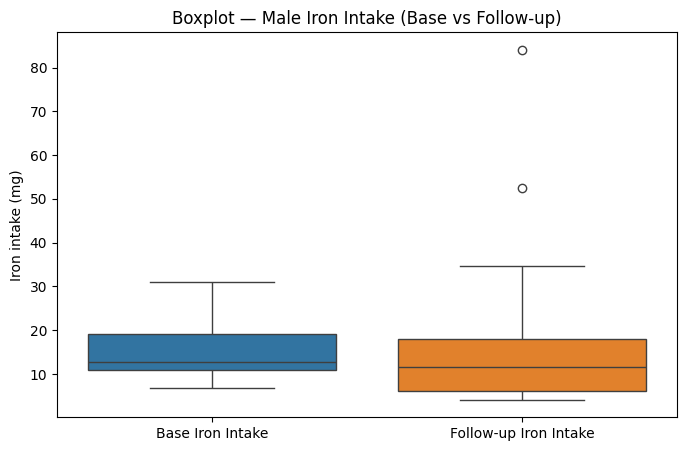

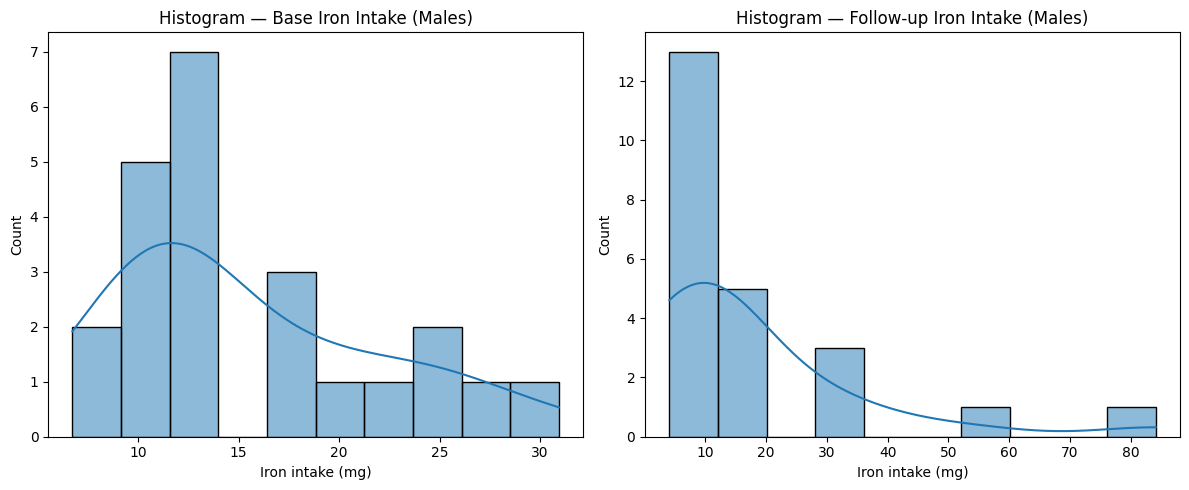

In [15]:
# Data:
male_base = Nutrix_males_no_nan_df['base_Iron(mg)']
male_follow = Nutrix_males_no_nan_df['followup_Iron(mg)']

# -----------------------------
# 1️⃣ BOXPLOTS
# -----------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(data=[male_base, male_follow])
plt.xticks([0, 1], ['Base Iron Intake', 'Follow-up Iron Intake'])
plt.ylabel("Iron intake (mg)")
plt.title("Boxplot — Male Iron Intake (Base vs Follow-up)")
plt.show()

# -----------------------------
# 2️⃣ HISTOGRAMS
# -----------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(male_base, kde=True, bins=10)
plt.title("Histogram — Base Iron Intake (Males)")
plt.xlabel("Iron intake (mg)")

plt.subplot(1, 2, 2)
sns.histplot(male_follow, kde=True, bins=10)
plt.title("Histogram — Follow-up Iron Intake (Males)")
plt.xlabel("Iron intake (mg)")

plt.tight_layout()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=442c3d06-fa27-4eb9-95a5-3c4fa7c81d32' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>